<a href="https://colab.research.google.com/github/RaphaPUC/MVP/blob/main/PUC_MVP_Projeto_de_Machine_Learning_Classificacao%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Problema

O problema é a dificuldade dos usuários em encontrar filmes e séries que correspondam aos seus gostos individuais nos serviços de streaming, devido à vasta quantidade de opções disponíveis.

A hipótese é que os usuários tendem a preferir conteúdo que reflete sentimentos positivos em resenhas e avaliações anteriores.

Os dados selecionados devem incluir resenhas de filmes com sentimentos claramente identificáveis e avaliações dos usuários.

 O dataset consiste em resenhas de filmes do IMDb, incluindo o texto da resenha, a avaliação associada (positiva ou negativa), e o ID do filme.


# Preparação de Dados
O dataset já está separado em conjuntos de treino e teste, conforme indicado pelo código data.load_data() que retorna (x_train, y_train), (x_test, y_test). Não há menção a um conjunto de validação separado, mas é possível criar um usando uma fração do conjunto de treino, como mostrado no método model.fit() onde validation_split=0.2 reserva 20% dos dados de treino para validação.
Operações de transformação de dados incluirão a normalização do texto e vetorização das palavras.
A validação cruzada é útil para avaliar modelos, mas pode ser demorada e não é sempre necessária.
No caso de Análise de Sentimento, a validação cruzada pode não ser necessária por conta do conjunto de dados do IMDB ser grande, então temos muitos dados para treinar. E o modelo já usa uma parte dos dados de treino para validação durante o treinamento. Então a validação cruzada seria demorada devido ao tamanho do conjunto de dados.
A seleção de atributos se concentrará em palavras-chave e sentimentos expressos nas resenhas.


# Modelagem e Treinamento
Foi escolhido o Keras, um modelo popular que transforma palavras em números e entende a relação entre elas.
 Foram ajustados alguns detalhes do modelo para garantir que ele aprenda da melhor maneira.
 O modelo foi treinado corretamente, sem problemas de underfitting, o que significa que ele aprendeu bem com os dados.
 É possível melhorar ainda mais o modelo ajustando alguns detalhes, como a taxa de aprendizado.


# Avaliação de Resultados
 Métricas de Avaliação: Foi executada uma métrica chamada SparseCategoricalAccuracy para avaliar o modelo.

O modelo foi treinado com a base de treino e testado com a base de teste, conforme indicado pelas etapas de ajuste (fit) e avaliação (evaluate).

 Foi implementado o modelo LSTM para análise de sentimento. Mas que é adequado para sequências de texto devido à sua capacidade de capturar dependências de longo prazo.

# Análise de Sentimento - base IMDB

Etapas:

- Carregar dados
- Definir modelo Keras
- Compilar modelo Keras
- Ajustar (fit) modelo Keras
- Avaliar (evalute) modelo Keras
- Faça previsões (predict)

## Carregar dados

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
#Para evitar que o console fique poluído com mensagens desnecessárias.

In [ ]:
#Importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = data.load_data()
#Importando dataset IMB, onde x_train é a lista de críticas de filmes e y_train de rótulos de sentimento (1 = positivo, 0 = negativo). x_test e y_test são os dados de teste de mesma estrutura.

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape
#x_train é um array de listas, onde cada lista representa uma crítica de filme. y_train é um array de rótulos, onde cada rótulo é 0 (para uma crítica negativa) ou 1 (para uma crítica positiva).

((25000,), (25000,))

In [ ]:
x_test.shape, y_test.shape
#x_test.shape retorna o número total de críticas de filmes no conjunto de teste. y_test.shape retornará o número total de rótulos no conjunto de teste.

((25000,), (25000,))

In [ ]:
x_train[0]
#É a primeira crítica de filme no conjunto de treinamento. Cada crítica é uma lista de índices de palavras. Cada índice corresponde a uma palavra específica no vocabulário.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
len(x_train[0])
#Retorna o comprimento da primeira crítica de filme no conjunto de treinamento, ou seja, o número de palavras na primeira crítica.

218

In [ ]:
y_train[:5]
#Retorna os primeiros 5 rótulos no conjunto de treinamento. No contexto do conjunto de dados IMDB, cada rótulo é 0 (para uma crítica negativa) ou 1 (para uma crítica positiva).
#Portanto, y_train[:5] retornará os rótulos de sentimento das primeiras 5 críticas no conjunto de treinamento.

array([1, 0, 0, 1, 0])

In [ ]:
np.unique(y_train, return_counts=True)
#Retorna os valores únicos em y_train e conta quantas vezes cada um aparece.
#A expressão vai contar quantas críticas negativas e positivas existem no conjunto de treinamento.

(array([0, 1]), array([12500, 12500]))

In [ ]:
word_index = data.get_word_index()
# word_index
#Criando um dicionário de palavras para índices a partir do conjunto de dados IMDB.

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
len(word_index)
#Retorna o número de entradas no dicionário.

88584

In [ ]:
word_index["the"]
#Retorna o índice único que representa a palavra “the”.

1

In [ ]:
for chave, valor in word_index.items():
    if valor == 1:
        print(chave)
        #Retorna o índice único que representa o valor “1”.

the


In [ ]:
for review in x_train[:5]:
    print(len(review))
    #Imprime o número de palavras nas primeiras 5 críticas no conjunto de treinamento.

218
189
141
550
147


# **Conceito de Token**

No processamento de linguagem natural, como na análise de dados de texto do IMDB, um “token” é basicamente uma palavra. “Tokenização” é o processo de dividir o texto em palavras individuais, que chamamos de “tokens”. Isso é importante porque ajuda a transformar o texto em uma forma que os modelos de aprendizado de máquina podem entender e usar. Por exemplo, uma frase é dividida em palavras individuais, e cada palavra é um “token”.

Considere a frase "Aprendendo processamento de linguagem natural". Na tokenização, esta frase seria dividida em tokens individuais. Cada palavra representa um token:

- Token 1: "Aprendendo"
- Token 2: "processamento"
- Token 3: "de"
- Token 4: "linguagem"
- Token 5: "natural"

Neste exemplo, a frase original é decomposta em palavras isoladas, cada uma considerada um token.

Um exemplo onde um token não é necessariamente uma palavra pode ser encontrado na tokenização baseada em caracteres ou sílabas. Por exemplo, na frase "Incrível", a tokenização por sílabas resultaria nos tokens "In", "crí", "vel". Aqui, cada sílaba é tratada como um token distinto, ao invés de cada palavra inteira. Este tipo de tokenização pode ser útil em tarefas de processamento de linguagem natural que exigem uma análise mais detalhada do texto, como na compreensão de padrões fonéticos ou na análise de idiomas com estruturas de palavras complexas.

- PAD é o token usado para preenchimento. Nós preenchemos todas as sequências para o mesmo comprimento, que é o comprimento da sequência mais longa.
- START é o token usado para marcar o início de uma sequência.
- UNK é o token usado para marcar palavras desconhecidas (palavras que não estão no vocabulário).
- UNUSED é o token usado para preencher as posições não utilizadas em uma sequência.

Preparando o dicionário para ser usado em NLP, onde cada palavra é mapeada para um valor único, e quatro tokens especiais são adicionados para ajudar no processamento das sequências.

In [ ]:
word_index = {chave: (valor + 3) for chave, valor in word_index.items()}
#O código está atualizando o dicionário word_index ao adicionar 3 a cada valor (índice) no dicionário.

In [ ]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
#Adicionando quatro novas palavras ao word_index. Essas palavras são especiais e usadas para tarefas específicas ao lidar com texto:
#"<PAD>": Usado para preencher o texto para que todas as críticas tenham o mesmo tamanho.
#"<START>": Marca o início de uma crítica.
#"<UNK>": Representa uma palavra desconhecida ou muito rara.
#"<UNUSED>"": Um espaço reservado para palavras que não são usadas.

In [ ]:
for chave, valor in word_index.items():
    if valor == 1:
        print(chave)
        #Imprimindo a chave (palavra) cujo valor (índice) é 1.

<START>


In [ ]:
def decode_review(text, index):
    reverse_index = {value: key for key, value in index.items()}
    return " ".join([reverse_index.get(value, "<UNK>") for value in text])
    #A função decode_review transforma uma lista de números em uma frase.
    #Ela faz isso usando o dicionário que mapeia números para palavras. Se um número não está no dicionário, ela usa a palavra "<UNK>".
    #Então, ela junta todas as palavras com espaços para formar uma frase.

In [ ]:
decode_review(x_train[0], word_index)
#Transforma essa lista de números de volta em uma frase legível, onde cada número é substituído pela palavra correspondente.

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [ ]:
import textwrap


def print_review(text, width=50):
    wrapper = textwrap.TextWrapper(width=width)
    print(wrapper.fill(text))
    #Permite que o código use a funcionalidade de formatação de texto do Python.
    #Isso formata o texto para que cada linha tenha no máximo a largura especificada.

In [ ]:
print_review(decode_review(x_train[0], word_index))
#Após converter os tokens na revisão de volta para palavras.
#Imprime a revisão decodificada onde cada linha tenha 50 caracteres.

<START> this film was just brilliant casting
location scenery story direction everyone's really
suited the part they played and you could just
imagine being there robert redford's is an amazing
actor and now the same being director norman's
father came from the same scottish island as
myself so i loved the fact there was a real
connection with this film the witty remarks
throughout the film were great it was just
brilliant so much that i bought the film as soon
as it was released for retail and would recommend
it to everyone to watch and the fly fishing was
amazing really cried at the end it was so sad and
you know what they say if you cry at a film it
must have been good and this definitely was also
congratulations to the two little boy's that
played the part's of norman and paul they were
just brilliant children are often left out of the
praising list i think because the stars that play
them all grown up are such a big profile for the
whole film but these children are amazing and
sho

https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

In [ ]:
print_review(decode_review(x_train[3], word_index))
#decodifica a quarta revisão no conjunto de treinamento (x_train[3])

<START> the scots excel at storytelling the
traditional sort many years after the event i can
still see in my mind's eye an elderly lady my
friend's mother retelling the battle of culloden
she makes the characters come alive her passion is
that of an eye witness one to the events on the
sodden heath a mile or so from where she lives br
br of course it happened many years before she was
born but you wouldn't guess from the way she tells
it the same story is told in bars the length and
breadth of scotland as i discussed it with a
friend one night in mallaig a local cut in to give
his version the discussion continued to closing
time br br stories passed down like this become
part of our being who doesn't remember the stories
our parents told us when we were children they
become our invisible world and as we grow older
they maybe still serve as inspiration or as an
emotional reservoir fact and fiction blend with
aspiration role models warning stories archetypes
magic and mystery br br my n

In [ ]:
x_train = keras.utils.pad_sequences(
    x_train,
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

x_test = keras.utils.pad_sequences(
    x_test,
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)
#pad_sequences= Cada sequência é uma revisão de filme representada como uma lista de tokens.
#value=word_index["<PAD>"]: Isso define o valor que será usado para preencher as sequências que são mais curtas que o comprimento máximo. No caso, <PAD> é um token especial que representa o preenchimento.
#truncating="post": Isso significa que as sequências que são mais longas que o comprimento máximo serão truncadas no final.
#maxlen=256:Define o comprimento máximo para as sequências. Qualquer sequência que seja mais longa que isso será truncada e qualquer sequência que seja mais curta que isso será preenchida.

In [ ]:
print_review(decode_review(x_train[0], word_index))
#Imprimindo a revisão decodificada.
#<START>:Token especial que indica o início de uma revisão.
#<PAD>:Token especial usado para preencher todas as sequências para o mesmo comprimento.Preenchemos todas as sequências para terem o mesmo comprimento da sequência mais longa.

<START> this film was just brilliant casting
location scenery story direction everyone's really
suited the part they played and you could just
imagine being there robert redford's is an amazing
actor and now the same being director norman's
father came from the same scottish island as
myself so i loved the fact there was a real
connection with this film the witty remarks
throughout the film were great it was just
brilliant so much that i bought the film as soon
as it was released for retail and would recommend
it to everyone to watch and the fly fishing was
amazing really cried at the end it was so sad and
you know what they say if you cry at a film it
must have been good and this definitely was also
congratulations to the two little boy's that
played the part's of norman and paul they were
just brilliant children are often left out of the
praising list i think because the stars that play
them all grown up are such a big profile for the
whole film but these children are amazing and
sho

In [ ]:
x_train[0]
#Cada número na matriz corresponde a uma palavra específica. Por exemplo, o número 1 representa a palavra <START>.
#A sequência de números representa a ordem das palavras na revisão. Por exemplo, a sequência [1, 14, 22, 16, 43] representa a sequência de palavras <START> this film was just.
#O número 0 representa o token especial <PAD>, que é usado para preencher todas as sequências para terem o mesmo comprimento.

array([    1,    14,    22,    16,    43,   530,   973,  1622,  1385,
          65,   458,  4468,    66,  3941,     4,   173,    36,   256,
           5,    25,   100,    43,   838,   112,    50,   670, 22665,
           9,    35,   480,   284,     5,   150,     4,   172,   112,
         167, 21631,   336,   385,    39,     4,   172,  4536,  1111,
          17,   546,    38,    13,   447,     4,   192,    50,    16,
           6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
         469,     4,    22,    71,    87,    12,    16,    43,   530,
          38,    76,    15,    13,  1247,     4,    22,    17,   515,
          17,    12,    16,   626,    18, 19193,     5,    62,   386,
          12,     8,   316,     8,   106,     5,     4,  2223,  5244,
          16,   480,    66,  3785,    33,     4,   130,    12,    16,
          38,   619,     5,    25,   124,    51,    36,   135,    48,
          25,  1415,    33,     6,    22,    12,   215,    28,    77,
          52,     5,

In [ ]:
print_review(decode_review(x_train[3], word_index))
#Imprimindo a quarta revisão (índice 3) no conjunto de treinamento, que foi decodificada de números para palavras.

<START> the scots excel at storytelling the
traditional sort many years after the event i can
still see in my mind's eye an elderly lady my
friend's mother retelling the battle of culloden
she makes the characters come alive her passion is
that of an eye witness one to the events on the
sodden heath a mile or so from where she lives br
br of course it happened many years before she was
born but you wouldn't guess from the way she tells
it the same story is told in bars the length and
breadth of scotland as i discussed it with a
friend one night in mallaig a local cut in to give
his version the discussion continued to closing
time br br stories passed down like this become
part of our being who doesn't remember the stories
our parents told us when we were children they
become our invisible world and as we grow older
they maybe still serve as inspiration or as an
emotional reservoir fact and fiction blend with
aspiration role models warning stories archetypes
magic and mystery br br my n

In [ ]:
for review in x_train[:5]:
    print(len(review))
    #Este é um loop for que itera sobre as primeiras 5 revisões no conjunto de treinamento.
    #Imprime o comprimento da revisão.

256
256
256
256
256


In [ ]:
x_train.shape
#Formato dos dados de treinamento.

(25000, 256)

## Definir modelo Keras

### Embedding

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

O Embedding no Keras funciona como um tradutor que transforma números, cada um representando uma palavra, em vetores de números reais em um espaço multidimensional. Cada vetor representa uma palavra de maneira única, capturando nuances de seu significado e relação com outras palavras. Por exemplo, na representação vetorial, palavras com significados semelhantes, como "feliz" e "alegre", ficarão próximas no espaço vetorial. Esses vetores são aprendidos durante o treinamento do modelo, permitindo que a máquina compreenda e processe textos de maneira mais eficaz. Isso é fundamental em tarefas como análise de sentimentos ou tradução automática, onde a compreensão do contexto e das nuances das palavras é crucial.

![Screenshot 2023-12-21 143449.png](attachment:5da53b07-30e6-4280-aa90-a045efdd64c8.png)

In [ ]:
model = keras.Sequential()
#Inicializa um novo modelo sequencial.
model.add(keras.layers.InputLayer(input_shape=(256,)))
#Adiciona uma camada de entrada. Cada entrada para o modelo é um vetor de 256 dimensões.
model.add(keras.layers.Embedding(len(word_index), 64))
#Adiciona uma camada de incorporação. A camada de incorporação transforma inteiros positivos (índices) em vetores densos de tamanho fixo.
model.add(keras.layers.LSTM(64, dropout=0.5))
#Adiciona uma camada LSTM (Long Short-Term Memory). 64 é o número de unidades na camada LSTM. dropout=0.5, é a fração das unidades a serem descartadas durante o treinamento.
model.add(keras.layers.Dense(2, activation="sigmoid"))
#Adiciona uma camada densa (também conhecida como camada totalmente conectada). A camada densa tem 2 unidades e usa a função de ativação sigmoid.
model.summary()
#Imprime um resumo do modelo, incluindo o número total de parâmetros e a forma de saída de cada camada.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 64)           5669632   
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 5702786 (21.75 MB)
Trainable params: 5702786 (21.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilar modelo Keras

In [ ]:
optimizer = keras.optimizers.Adam(1E-4)
#Define o otimizador que será usado para treinar o modelo.
loss = keras.losses.SparseCategoricalCrossentropy()
#Define a função de perda que o modelo tentará minimizar durante o treinamento.
metric = keras.metrics.SparseCategoricalAccuracy()
#Define a métrica que será usada para avaliar o desempenho do modelo durante o treinamento.

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
#Compila o modelo com o otimizador, função de perda e métricas especificados.

## Fit modelo Keras

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=1,
)
#Treinando o modelo usando os dados de treinamento.

Epoch 1/20
40/40 [==============================] - 61s 1s/step - loss: 0.6933 - sparse_categorical_accuracy: 0.4947 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5090
Epoch 2/20
40/40 [==============================] - 62s 2s/step - loss: 0.6929 - sparse_categorical_accuracy: 0.5084 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5090
Epoch 3/20
40/40 [==============================] - 55s 1s/step - loss: 0.6926 - sparse_categorical_accuracy: 0.5149 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5122
Epoch 4/20
40/40 [==============================] - 61s 2s/step - loss: 0.6922 - sparse_categorical_accuracy: 0.5231 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5104
Epoch 5/20
40/40 [==============================] - 56s 1s/step - loss: 0.6918 - sparse_categorical_accuracy: 0.5217 - val_loss: 0.6926 - val_sparse_categorical_accuracy: 0.5014
Epoch 6/20
40/40 [==============================] - 59s 1s/step - loss: 0.6910 - sparse_categorical_accuracy: 

## Evaluate modelo Keras

In [78]:
model.evaluate(x_test, y_test)
#Avalia o desempenho do modelo

782/782 [==============================] - 31s 40ms/step - loss: 0.3607 - sparse_categorical_accuracy: 0.8578


[0.3606754243373871, 0.8578400015830994]

## Predict modelo Keras

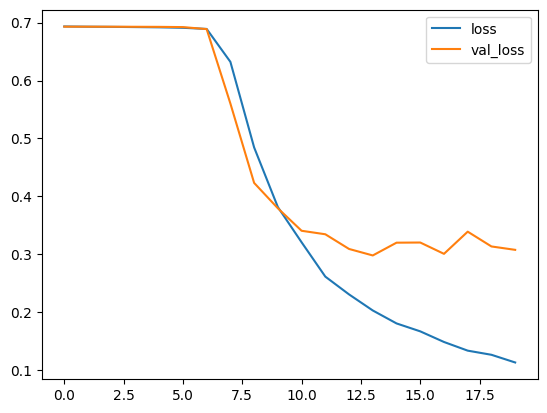

In [92]:
plt.plot(history.history["loss"], label="loss")
#Plota a perda do modelo nos dados de treinamento em cada época.
plt.plot(history.history["val_loss"], label="val_loss")
#Plota a perda do modelo nos dados de validação em cada época.
plt.legend()
plt.show()

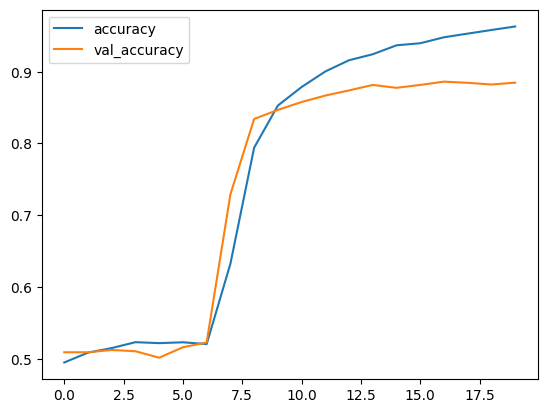

In [93]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
#Plota a precisão do modelo nos dados de treinamento em cada época.
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
#Plota a precisão do modelo nos dados de validação em cada época.
plt.legend()
plt.show()

In [94]:
for i in range(10):
    #Loop "for" que itera sobre as primeiras 10 revisões no conjunto de teste.
    print("Label: ", y_test[i])
    #Imprime o rótulo verdadeiro da i-ésima revisão no conjunto de teste. O rótulo é o sentimento associado à revisão (positivo ou negativo).
    print("Prediction (sigmoid): ", model.predict(np.expand_dims(x_test[i], axis=0), verbose=0).flatten())
    #Faz uma previsão para a i-ésima revisão no conjunto de teste.
    print("Prediction: ", np.argmax(model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)))
    #Imprime a classe prevista pelo modelo para a i-ésima revisão.
    print()

Label:  0
Prediction (sigmoid):  [0.90925366 0.15894137]
Prediction:  0

Label:  1
Prediction (sigmoid):  [0.05817627 0.896301  ]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.07284889 0.87681985]
Prediction:  1

Label:  0
Prediction (sigmoid):  [0.67362046 0.36813578]
Prediction:  0

Label:  1
Prediction (sigmoid):  [0.05359763 0.9018871 ]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.17822053 0.76681894]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.42067075 0.5601768 ]
Prediction:  1

Label:  0
Prediction (sigmoid):  [0.95012516 0.10692701]
Prediction:  0

Label:  0
Prediction (sigmoid):  [0.05447364 0.9007219 ]
Prediction:  1

Label:  1
Prediction (sigmoid):  [0.44255218 0.5449712 ]
Prediction:  1



In [95]:
print_review(decode_review(x_test[5], word_index), width=80)
#Esta função está decodificando a sexta revisão (índice 5) no conjunto de teste. As revisões são codificadas como sequências de números, onde cada número representa uma palavra específica.

<START> i'm absolutely disgusted this movie isn't being sold all who love this
movie should email disney and increase the demand for it they'd eventually have
to sell it then i'd buy copies for everybody i know everything and everybody in
this movie did a good job and i haven't figured out why disney hasn't put this
movie on dvd or on vhs in rental stores at least i haven't seen any copies this
is a wicked good movie and should be seen by all the kids in the new generation
don't get to see it and i think they should it should at least be put back on
the channel this movie doesn't deserve a cheap download it deserves the real
thing i'm them now this movie will be on dvd <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [96]:
review_good = "The movie was great! The animation and the graphics were out of this world. I would recommend this movie."
review_bad = "The movie was terrible. The animation was poor and the graphics were awful. I would not recommend this movie."
#Criadas duas variaveis de avaliações (boa e ruim).

In [97]:
print_review(review_good)

The movie was great! The animation and the
graphics were out of this world. I would recommend
this movie.


In [98]:
print_review(review_bad)

The movie was terrible. The animation was poor and
the graphics were awful. I would not recommend
this movie.


In [99]:
def encode_review(text, index):
    import string
    text = text.translate(str.maketrans("", "", string.punctuation)).lower()
    #Remove toda a pontuação do texto e converte todas as letras para minúsculas.
    return [index.get(word, 2) for word in text.split(" ")]
    #Divide o texto em palavras usando espaços como delimitadores e converte cada palavra em um número usando o índice fornecido. Se uma palavra não está no índice, ela é convertida para o número 2.

In [100]:
encode_review(review_good, word_index)

[4, 20, 16, 87, 4, 748, 5, 4, 2876, 71, 46, 7, 14, 182, 13, 62, 386, 14, 20]

In [101]:
decode_review(encode_review(review_good, word_index), word_index)
#Primeiro codifica a revisão positiva (review_good) em uma sequência de números usando a função encode_review, e depois decodifica essa sequência de volta em texto usando a função decode_review.

'the movie was great the animation and the graphics were out of this world i would recommend this movie'

In [102]:
review_good = keras.utils.pad_sequences(
    #Esta função transforma uma lista de sequências (listas de números inteiros) em uma matriz 2D.
    [encode_review(review_good, word_index)],
    #Cada revisão é uma lista de números, onde cada número representa uma palavra específica.
    value=word_index["<PAD>"],
    #valor usado para preencher as sequências. Usando o número que representa a palavra especial <PAD>.
    padding="post",
    #Caso uma sequência for mais curta que o comprimento limite, os valores de preenchimento serão adicionados no final da sequência.
    truncating="post",
    #Se uma sequência for mais longa que o comprimento limite, os valores extras no final da sequência serão removidos.
    maxlen=256
    #Comprimento das sequências, todas as sequências terão este comprimento após o preenchimento/truncamento.
)

review_bad = keras.utils.pad_sequences(
    [encode_review(review_bad, word_index)],
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

In [103]:
review_good

array([[   4,   20,   16,   87,    4,  748,    5,    4, 2876,   71,   46,
           7,   14,  182,   13,   62,  386,   14,   20,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
review_bad

array([[   4,   20,   16,  394,    4,  748,   16,  338,    5,    4, 2876,
          71,  373,   13,   62,   24,  386,   14,   20,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
model.predict(review_good)

1/1 [==============================] - 0s 60ms/step


array([[0.17457633, 0.770273  ]], dtype=float32)

In [ ]:
model.predict(review_bad)

1/1 [==============================] - 0s 63ms/step


array([[0.95967066, 0.09328773]], dtype=float32)